In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score,confusion_matrix,log_loss
from sklearn.linear_model import LogisticRegression


In [2]:
df=pd.read_csv("students_data.csv")
df.drop("StudentID",axis=1,inplace=True)
df

,Gender,StudyHours,Attendance,InternetAccess,ExtraClasses,ParentalSupport,SportsActivity,Performance
0,Male,3.0,87.9,Yes,No,Low,Yes,Medium
1,Female,18.1,51.2,Yes,No,Medium,No,Medium
2,Male,10.6,51.1,No,No,Low,Yes,Low
3,Male,16.7,66.2,Yes,No,Low,Yes,Medium
4,Male,7.1,74.4,Yes,Yes,Low,No,Medium
...,...,...,...,...,...,...,...,...
795,Male,17.6,82.8,Yes,No,High,No,High
796,Male,19.5,97.8,Yes,Yes,Low,No,High
797,Male,19.4,53.4,Yes,Yes,Low,Yes,High
798,Male,15.2,52.9,No,Yes,Low,Yes,Medium


In [3]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])

df

,Gender,StudyHours,Attendance,InternetAccess,ExtraClasses,ParentalSupport,SportsActivity,Performance
0,1,3.0,87.9,1,0,1,1,2
1,0,18.1,51.2,1,0,2,0,2
2,1,10.6,51.1,0,0,1,1,1
3,1,16.7,66.2,1,0,1,1,2
4,1,7.1,74.4,1,1,1,0,2
...,...,...,...,...,...,...,...,...
795,1,17.6,82.8,1,0,0,0,0
796,1,19.5,97.8,1,1,1,0,0
797,1,19.4,53.4,1,1,1,1,0
798,1,15.2,52.9,0,1,1,1,2


In [4]:
x=df.drop("Performance",axis=1)
y=df["Performance"]
y

0      2
1      2
2      1
3      2
4      2
      ..
795    0
796    0
797    0
798    2
799    2
Name: Performance, Length: 800, dtype: int64

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
model=LogisticRegression(max_iter=50)
model.fit(x_train,y_train)

c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,50
,multi_class,'deprecated'


In [7]:
cross=cross_validate(model,x,y,cv=5,return_train_score=True)
cross

c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-le

{'fit_time': array([0.02063131, 0.01901841, 0.01991034, 0.01820922, 0.01601768]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.80625, 0.80625, 0.8    , 0.825  , 0.8125 ]),
 'train_score': array([0.8265625, 0.8265625, 0.8359375, 0.8234375, 0.8265625])}

In [8]:
y_pred=model.predict(x_test)
y_pred

array([2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 2])

In [9]:
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy:{accuracy*100:.2f}%")

accuracy:80.62%


In [10]:
y_prob=model.predict_proba(x_test)
y_prob

array([[4.57335150e-03, 1.53271209e-02, 9.80099528e-01],
       [1.51428120e-01, 9.37342771e-02, 7.54837603e-01],
       [5.00431833e-01, 6.78136008e-03, 4.92786807e-01],
       [1.13380868e-01, 1.20710639e-02, 8.74548069e-01],
       [9.38702443e-01, 6.37626586e-03, 5.49212916e-02],
       [5.82345075e-02, 7.38730993e-02, 8.67892393e-01],
       [6.71569633e-03, 1.06390123e-02, 9.82645291e-01],
       [9.95180281e-01, 1.41194406e-04, 4.67852448e-03],
       [9.42289307e-01, 5.87552565e-04, 5.71231407e-02],
       [3.40865063e-01, 8.68430107e-02, 5.72291926e-01],
       [4.88147947e-01, 3.30870054e-02, 4.78765048e-01],
       [7.99487410e-01, 5.58930915e-03, 1.94923281e-01],
       [7.89925341e-01, 3.18485502e-03, 2.06889804e-01],
       [4.09140575e-01, 1.88383449e-03, 5.88975590e-01],
       [1.29080177e-01, 3.02302750e-03, 8.67896795e-01],
       [9.13389784e-01, 7.55189987e-04, 8.58550256e-02],
       [1.54073834e-03, 2.79412088e-02, 9.70518053e-01],
       [4.52875834e-02, 3.63348

In [11]:
loss=log_loss(y_test,y_prob)
loss

0.4745376461666164

In [12]:
cm=confusion_matrix(y_test,y_pred)

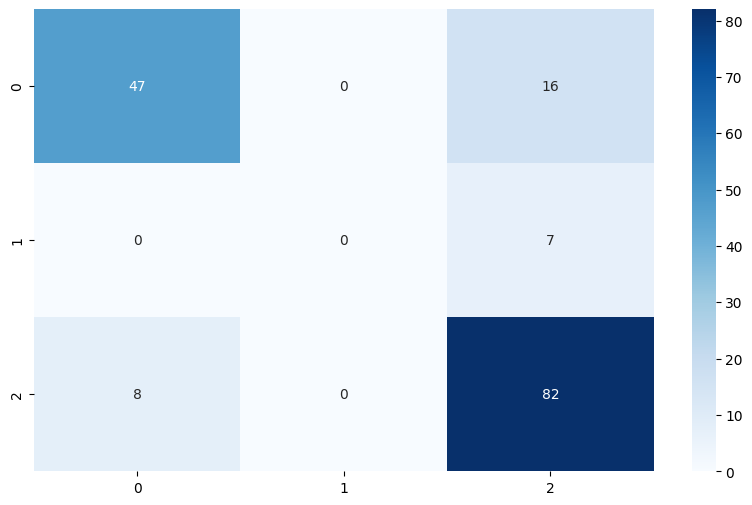

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.show()

In [14]:
data=pd.DataFrame({
    "Gender":label.fit_transform(["Male"]),
    "StudyHours":[3.0],   
    "Attendance":["87.9"],
    "InternetAccess":label.fit_transform(["Yes"]),
    "ExtraClasses":label.fit_transform(["No"]),
    "ParentalSupport":label.fit_transform(["Medium"]),
    "SportsActivity":label.fit_transform(["No"])
})
pre=model.predict(data)
pre


array([2])